In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense,Flatten, Conv2D, MaxPooling2D  , Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [7]:
# Generators
train_ds = keras.utils.image_dataset_from_directory(
    
    directory = 'TRAINING_PATH',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 50 ,
    image_size = (256,256)

)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'VALIDATION_PATH',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 50 ,
    image_size = (256,256)
)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

Found 20000 files belonging to 2 classes.


2024-03-12 18:33:04.106532: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-03-12 18:33:04.106558: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2024-03-12 18:33:04.106567: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2024-03-12 18:33:04.106938: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-12 18:33:04.107249: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 5000 files belonging to 2 classes.


In [8]:
# Normalisation
def process(image,label):
  image = tf.cast(image/255. , tf.float32)
  return image ,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [ ]:
# model creation

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer='l2'),  # L2 regularization
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])




In [10]:
from tensorflow.keras.optimizers import legacy

# Use the legacy Adam optimizer
optimizer = legacy.Adam(learning_rate=0.001)


In [11]:
callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

In [12]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [14]:
history = model.fit(train_ds, epochs=15, validation_data=validation_ds, callbacks=callbacks)
model.save('DogCatCNN.h5')

Epoch 1/15
400/400 [==============================] - ETA: 0s - loss: 12.2117 - accuracy: 0.6153

2024-03-12 18:35:35.616969: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


400/400 [==============================] - 88s 219ms/step - loss: 12.2117 - accuracy: 0.6153 - val_loss: 3.0096 - val_accuracy: 0.6174
Epoch 2/15


/Users/adityakumar/tensorflow-test2/env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


400/400 [==============================] - 88s 219ms/step - loss: 2.6553 - accuracy: 0.6424 - val_loss: 1.4597 - val_accuracy: 0.6350
Epoch 3/15
400/400 [==============================] - 88s 219ms/step - loss: 0.9929 - accuracy: 0.6690 - val_loss: 0.8238 - val_accuracy: 0.7144
Epoch 4/15
400/400 [==============================] - 86s 215ms/step - loss: 0.7250 - accuracy: 0.7127 - val_loss: 0.6259 - val_accuracy: 0.7572
Epoch 5/15
400/400 [==============================] - 84s 209ms/step - loss: 0.6430 - accuracy: 0.7308 - val_loss: 0.6362 - val_accuracy: 0.7390
Epoch 6/15
400/400 [==============================] - 84s 209ms/step - loss: 0.6198 - accuracy: 0.7545 - val_loss: 0.5768 - val_accuracy: 0.7800
Epoch 7/15
400/400 [==============================] - 84s 209ms/step - loss: 0.5994 - accuracy: 0.7720 - val_loss: 0.5903 - val_accuracy: 0.7766
Epoch 8/15
400/400 [==============================] - 83s 207ms/step - loss: 0.5714 - accuracy: 0.7944 - val_loss: 0.6055 - val_accuracy: 0.7

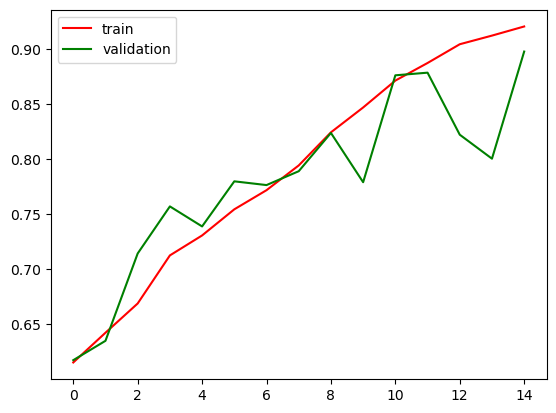

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red' , label = 'train')
plt.plot(history.history['val_accuracy'], color = 'green' , label = 'validation')
plt.legend()
plt.show()


In [18]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [27]:
from tensorflow.keras.preprocessing import image
import numpy as np

def prepare_custom_image(image_path):
    img = image.load_img(image_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch
    img_array /= 255.0  # Normalize to [0,1]
    return img_array

# Example usage
custom_image_path = '/Users/adityakumar/Desktop/Screenshots/Screenshot 2024-03-12 at 7.00.44 PM.png'
prepared_image = prepare_custom_image(custom_image_path)



from tensorflow.keras.models import load_model

# Path to your saved model
model_path = '/Users/adityakumar/Desktop/Project/DogCat/dog.h5'
model = load_model(model_path)

prediction = model.predict(prepared_image)
predicted_class = np.where(prediction[0] > 0.5, "Dog", "Cat")
print(f"The image is a {predicted_class}.")



1/1 [==============================] - 0s 60ms/step
The image is a ['Dog'].


2024-03-12 19:02:35.490829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
